In [40]:
!pip install matplotlib

In [41]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline


## data setup

### parameters

first, define the parameters of the population. we'll use the typical y=mx+b and b is 0

In [42]:
data_points = 20 # @param {type:"integer"}

slope = 3 # @param {type:"number"}

standard_error = 0.9 # @param {type:"number"}

max_x = 10 # @param {type:"integer"}
max_y = 10 # @param {type:"integer"}

# Start with 0.06, see how it bounces around?
learning_rate = 0.06 # @param {type:"number"}

### generate the data

In [43]:
# x values are uniform -- all numbers have an equally
# random chance of being generated - equal chance because of uniform
data_x = np.random.uniform(0.0, max_x, data_points)
# y-error values are normally distributed -- higher errors
# have a smaller chance of being generated
error = np.random.normal(0, standard_error, data_points)
# y data = x data + errors
data_y = slope * data_x + error

## visualizing our data

Text(0.5, 1.0, 'Our data')

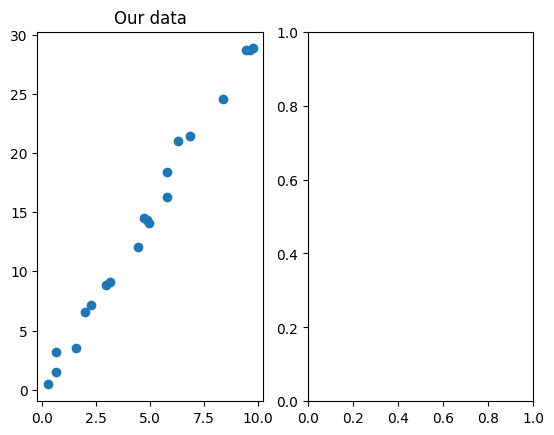

In [44]:
# two graphs
fig, axs = plt.subplots(1,2)
(data_graph, cost_graph) = axs

# plot our random data on the first
data_graph.scatter(data_x, data_y)
data_graph.set_title("Our data")

## cost function setup

In [45]:
## individual cost = (predicted - actual) ^ 2
def individual_cost(predicted, actual):
  #squaring it makes bigger errors penalized more and smaller errors penalized less
  return (predicted - actual)**2

## cost of the whole set is calculated by adding
def total_cost(slope_guess, actual_x, actual_y):
  # these are all vectors -- a shortcut to looping
  #predicted_y and actual_x are arrays
  predicted_y = actual_x * slope_guess
  # again a shortcut to looping -- doing the formula above
  total_cost = np.square(predicted_y - actual_y).sum()
  # divide the total cost by 2n, this is convention (avg cost)
  return total_cost / (2 * len(actual_x))

# let's test our cost function
test_slope_guess = 1
test_x = np.array([0,1,2])
test_y = np.array([0,3,6])
# y = 3x
# cost of (0,0): 0
# cost of (1,3), predicted is (1, 1) bc slope is 1: 3-1 = 2^2 = 4
# cost of (2,6), predicted is (2, 2) bc slope is 1: 6-2 = 4^2 = 16
# total cost = 20 / (3*2) = 3.33
test_cost = total_cost(test_slope_guess, test_x, test_y)
print(f"Your guess of m={test_slope_guess} has cost {test_cost}.")

Your guess of m=1 has cost 3.3333333333333335.


what does the cost function look like?

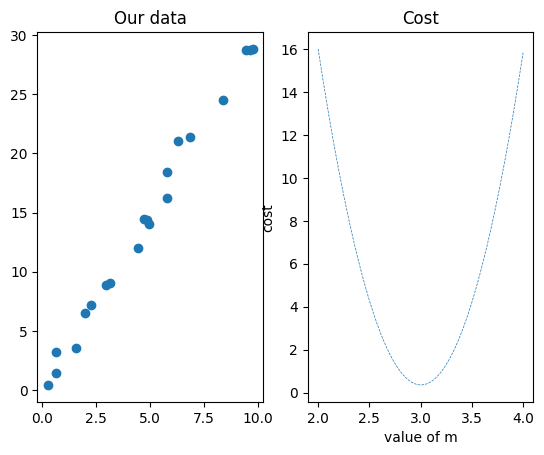

In [46]:
# in reality, we don't know; but here, we can cheat and display one
cost_graph.clear()
cost_graph.set_xlabel("value of m")
cost_graph.set_ylabel("cost")

cost_x = np.linspace(2,4, 200)
cost_y = []

for x in cost_x:
  cost_y.append(total_cost(x, data_x, data_y))

cost_graph.plot(cost_x, cost_y, linestyle="dashed", linewidth=0.5)
cost_graph.set_title("Cost")
cost_graph.figure

In [47]:
# find the derivative of the cost function
# e,g. if the slope is down, it should be negative
# cost = (predicted - actual) ^ 2 / 2n
# d/dx cost = 2 * (preadicted - actual) / 2n
# d/dx cost = (predicted - actual) / n
def slope_of_cost_function(slope_guess, actual_x, actual_y):
  predicted_y = actual_x * slope_guess
  slope_arr = (predicted_y - actual_y) * actual_x
  slope = ((predicted_y - actual_y) * actual_x).sum() / len(actual_x)
  return slope

test_slope = slope_of_cost_function(test_slope_guess, test_x, test_y)
print(f"Your cost function has slope {test_slope}")

Your cost function has slope -3.3333333333333335


now we finished the fake data and will actually start to iterate

## gradient descent!

set up learning process

In [48]:
# store this history for our reference
guesses = []
costs = []
# start with an approximate guess
slope_guess = 2.5

# our original guess and original cost
guesses.append(slope_guess)
costs.append(total_cost(slope_guess, data_x, data_y))

print(f"Guess of slope {slope_guess:.6f} has cost {total_cost(slope_guess, data_x, data_y):.9f}")

Guess of slope 2.500000 has cost 4.292725785


iterate learning process

In [49]:
predicted_y = data_x * slope_guess

#.plot is from the matplot library
data_line, = data_graph.plot(data_x, predicted_y, color="red")
cost_line, = cost_graph.plot(guesses,costs, color="red")

now the ACTUAL TRAINING how it will decide the line correctly

Guess of slope 3.1072 has cost 0.5296


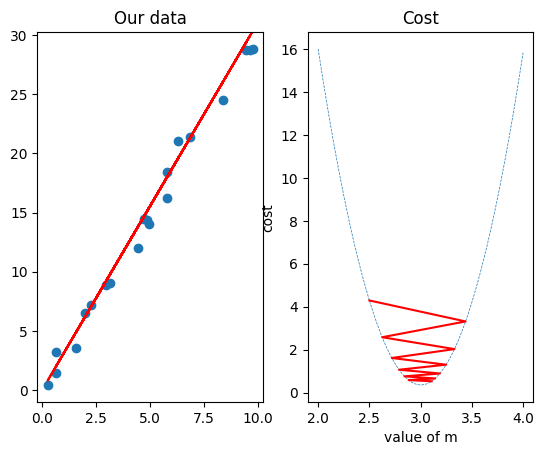

In [60]:
## train
# multiply by learning rate so that it doesn't go crazy with one guess and go too far in one direction
slope_guess = slope_guess - learning_rate * slope_of_cost_function(
    slope_guess, data_x, data_y)
guess_cost = total_cost(slope_guess, data_x, data_y)

guesses.append(slope_guess)
costs.append(guess_cost)
predicted_y = data_x * slope_guess

print(f"Guess of slope {slope_guess:.4f} has cost {guess_cost:.4f}")

data_line.set_ydata(predicted_y)
# guesses on x axis, costs on y axis
cost_line.set_data(guesses, costs)

data_graph.figure